# 镇海区社会救助领域红十字会救助月支出明细信息数据

## 1. 救助金额和救助日期的趋势线图

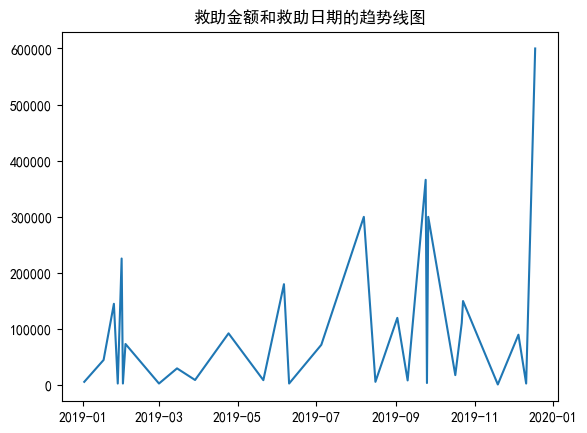

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

data = pd.read_csv("镇海区社会救助领域红十字会救助月支出明细信息数据.csv", encoding="utf-8", header=1)
# 将日期转换为时间序列，按照日期进行排序
data["救助日期"] = pd.to_datetime(data["救助日期"], format="%Y/%m/%d")
data = data.sort_values(by="救助日期")

# 按照救助日期对数据进行分组并计算救助金额总和
amount_by_date = data.groupby("救助日期")["救助金额"].sum()

# 绘制趋势线图
plt.plot(amount_by_date.index, amount_by_date.values)
plt.title("救助金额和救助日期的趋势线图")
plt.show()

## 2. 救助项目的救助金额总和饼图

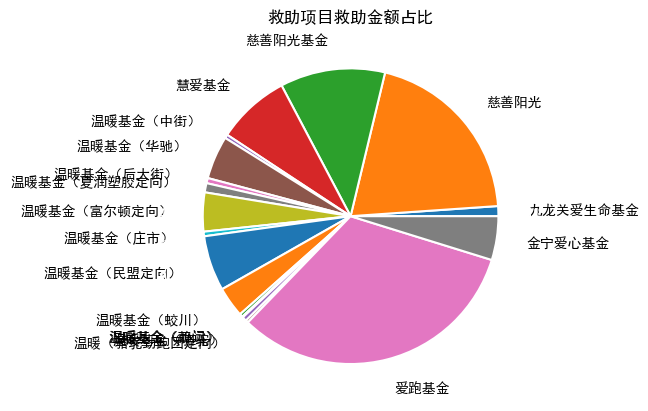

In [10]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 统计每个救助项目的救助金额总和，并绘制饼图
project_sum = data.groupby("救助项目")["救助金额"].sum()

# 绘制饼图
fig, ax = plt.subplots()
wedges, _, autotexts = ax.pie(project_sum.values, labels=project_sum.index, autopct='%.1f%%',
                              textprops={'fontsize': 10, 'color': 'black'},
                              wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
                              labeldistance=1.2, pctdistance=0.6)

# 将文本放到饼图的右侧
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_position((1.2 * np.sign(autotext.get_position()[0]), autotext.get_position()[1]))

# 增加白色边框
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1.5)

# 设置图形标题
ax.set_title('救助项目救助金额占比')

plt.show()